<a href="https://colab.research.google.com/github/rbhargava03/neuro140FinalProject/blob/main/SpaceObjectID_LRandRF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# preprocess data

#load in sklearn packages
import csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Read csv
features = []
labels = []
with open("/content/drive/MyDrive/Harvard/SpaceObjectIDProject/PayloadDebrisData.csv", newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # skip rows with missing data
        if (row['PERIOD'].strip() == '' or
            row['INCLINATION'].strip() == '' or
            row['APOGEE'].strip() == '' or
            row['PERIGEE'].strip() == ''):
            continue

        f = [
            float(row['PERIOD']),
            float(row['INCLINATION']),
            float(row['APOGEE']),
            float(row['PERIGEE'])
        ]
        label = 1 if row['OBJECT_TYPE'].strip().upper() == 'PAYLOAD' else 0

        features.append(f)
        labels.append(label)
X = np.array(features)
y = np.array(labels)

In [ ]:
# train/validation/test split
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1765, random_state=42)
# scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# traing logistic regression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# evaluate and print results
y_pred_logreg = logreg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.7265963203463204
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.98      0.83      5196
           1       0.73      0.13      0.21      2196

    accuracy                           0.73      7392
   macro avg       0.73      0.55      0.52      7392
weighted avg       0.73      0.73      0.65      7392



In [ ]:
# train random forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# evaluate and print results
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8925865800865801
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      5196
           1       0.92      0.70      0.79      2196

    accuracy                           0.89      7392
   macro avg       0.90      0.84      0.86      7392
weighted avg       0.90      0.89      0.89      7392



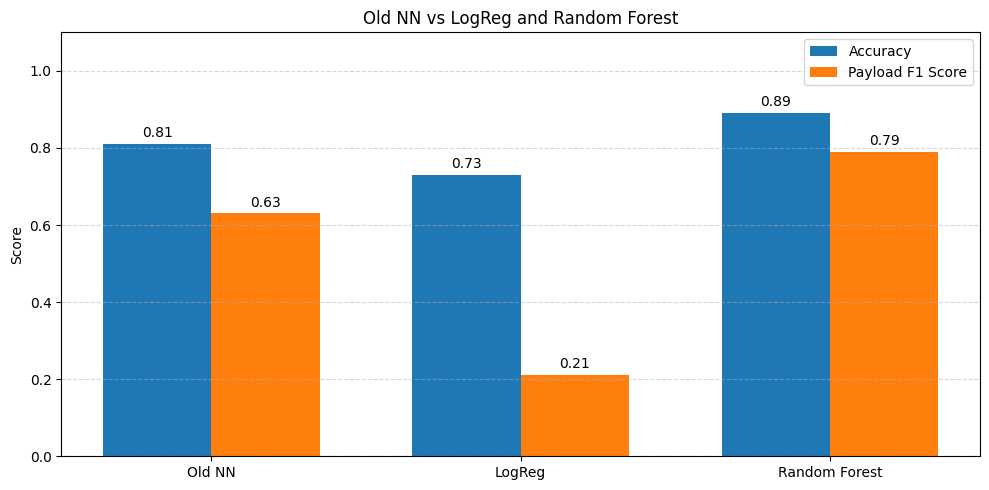

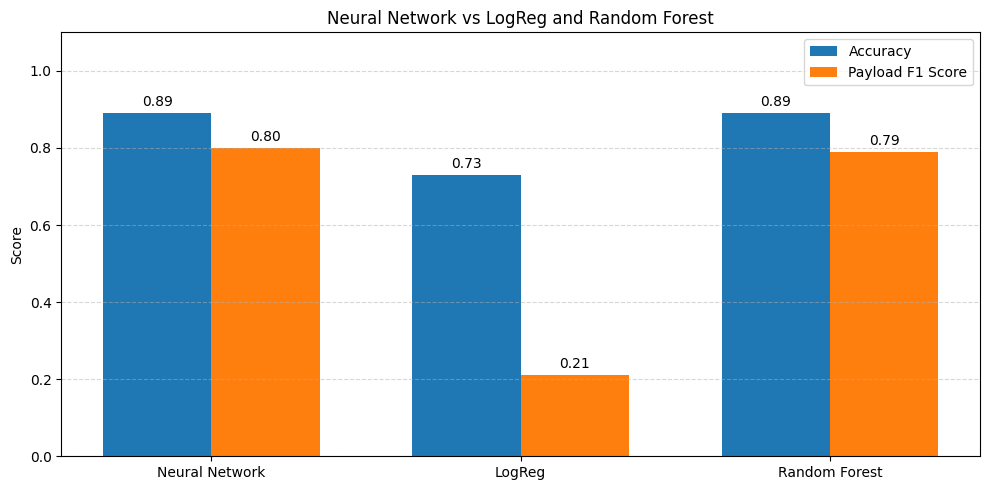

In [ ]:
# model comparisons for visualization

import matplotlib.pyplot as plt
# old model comparisons (used during NN development but no longer relevant)
models_old = ['Old NN', 'LogReg', 'Random Forest']
accuracy_old = [0.81, 0.73, 0.89]
payload_f1_old = [0.63, 0.21, 0.79]

# final model comparisons (this is what I will put in my report)
models_new = ['Neural Network', 'LogReg', 'Random Forest']
accuracy_new = [0.89, 0.73, 0.89]
payload_f1_new = [0.80, 0.21, 0.79]

def plot_comparison(models, accuracy, f1_scores, title):
    x = range(len(models))
    width = 0.35

    plt.figure(figsize=(10, 5))
    bars1 = plt.bar([p - width/2 for p in x], accuracy, width=width, label='Accuracy')
    bars2 = plt.bar([p + width/2 for p in x], f1_scores, width=width, label='Payload F1 Score')

    # Add value labels on top of bars
    for bar in bars1 + bars2:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom', fontsize=10)

    plt.xticks(x, models)
    plt.ylim(0, 1.1)
    plt.ylabel("Score")
    plt.title(title)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# graphs
plot_comparison(models_old, accuracy_old, payload_f1_old, "Old NN vs LogReg and Random Forest")
plot_comparison(models_new, accuracy_new, payload_f1_new, "Neural Network vs LogReg and Random Forest")


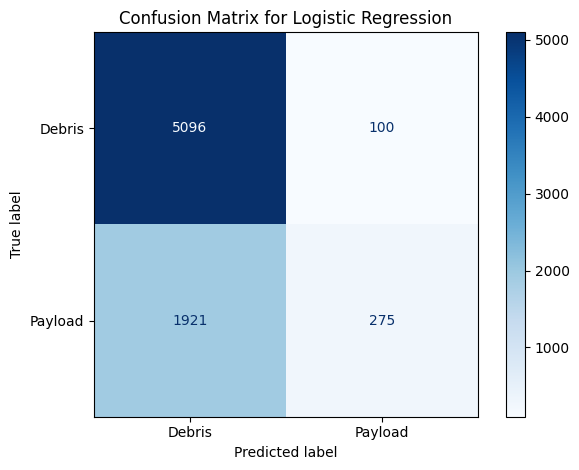

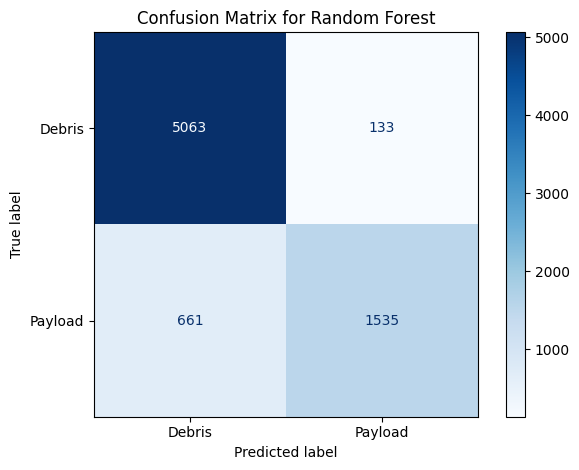

In [ ]:
#confusion matrices for RF and Logistec Regression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_conf_matrix(y_true, y_pred, *,
                     title="Confusion matrix",
                     labels=('Debris', 'Payload'),
                     filename="cm.png"):

    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels)

    disp.plot(values_format='d', cmap='Blues')
    plt.title(title)
    plt.tight_layout()
    plt.show()
plot_conf_matrix(y_test, y_pred_logreg,
                 title="Confusion Matrix for Logistic Regression")
plot_conf_matrix(y_test, y_pred_rf,
                 title="Confusion Matrix for Random Forest")
